In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import dataframe_image as dfi

df = pd.read_csv("assignment_3_cleaned_data_with_property_details.csv")
df

: 

: 

In [ ]:
income_df = pd.read_csv('income.csv')
income_df

,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Gross tax\nno.,Gross tax\n$,Medicare levy\nno.,Medicare levy\n$,Medicare levy surcharge\nno.,...,Estimated business net tax\n$,Australian superannuation income stream tax offset\nno.,Australian superannuation income stream tax offset\n$,Total net medical expenses tax offset\nno.,Total net medical expenses tax offset\n$,Low income tax offset\nno.,Low income tax offset\n$,People with private health insurance\nno.,Tax withheld from salary or wages\nno.,Tax withheld from salary or wages\n$
0,ACT,2600,"5,592","5,541","565,588,274","4,885","163,954,283","4,341","10,491,506",113,...,"12,061,834",909,"4,105,628",188,"228,538","1,908","548,535","4,532","3,665","101,405,483"
1,ACT,2601,"2,792","2,762","181,544,596","2,034","45,335,816","1,703","3,176,065",73,...,"1,099,452",167,"659,393",23,"25,202",850,"254,413","1,587","2,229","43,561,012"
2,ACT,2602,"19,096","19,029","1,303,424,567","16,234","302,209,555","14,377","23,514,522",427,...,"6,957,148","1,850","6,549,440",403,"423,186","7,683","2,312,033","13,055","14,967","288,632,965"
3,ACT,2603,"6,305","6,270","706,236,866","5,556","213,104,681","4,998","13,243,433",124,...,"18,641,488",677,"3,122,478",163,"256,295","2,033","608,924","5,016","4,468","122,477,060"
4,ACT,2604,"7,464","7,418","623,073,392","6,612","160,501,341","5,843","11,256,661",188,...,"2,905,655",541,"2,116,104",164,"246,280","2,531","721,359","5,416","6,023","155,364,315"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,WA,6770,769,765,"38,106,101",648,"6,950,661",530,"643,662",24,...,"175,809",2,918,0,0,425,"131,138",171,721,"8,040,666"
2569,WA,6798,925,920,"68,406,874",839,"15,764,322",771,"1,286,335",97,...,"509,233",7,"11,199",4,"1,618",311,"87,685",371,806,"16,329,648"
2570,WA,6799,246,245,"12,306,250",199,"2,454,097",177,"226,815",8,...,"110,481",1,93,1,315,136,"42,387",82,215,"2,690,718"
2571,WA,WA other,"16,233","15,621","1,219,075,436","12,740","353,863,631","8,879","17,598,011",448,...,"9,716,471",185,"566,212",121,"146,032","4,790","1,486,869","8,951","9,514","264,796,586"


In [5]:
income_cols = ['Postcode', 'Number of individuals\nno.', 'Taxable income or loss3\n$']
income_filtered_df = income_df[income_cols].reset_index()
for col in ['Number of individuals\nno.', 'Taxable income or loss3\n$']:
    income_filtered_df[col] = income_filtered_df[col].str.replace(',', '')
    income_filtered_df[col] = income_filtered_df[col].astype(float)

In [6]:
income_agg_df = income_filtered_df.groupby(['Postcode']).agg(
    {'Number of individuals\nno.':'sum',
     'Taxable income or loss3\n$': 'sum'}
).reset_index()
income_agg_df['mean_income'] = income_agg_df['Taxable income or loss3\n$'].astype(int)/income_agg_df['Number of individuals\nno.'].astype(int)

c:\Users\dlatl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [7]:
income_agg_df

,Postcode,Number of individuals\nno.,Taxable income or loss3\n$,mean_income
0,2000,36185.0,1.726846e+09,47722.712892
1,2006,83.0,6.715139e+06,80905.289157
2,2007,4769.0,2.219909e+08,46548.739987
3,2008,5607.0,6.101331e+08,108816.324059
4,2009,9726.0,8.066583e+08,82938.340428
...,...,...,...,...
2567,QLD other,7844.0,4.852196e+08,61858.691484
2568,SA other,2494.0,1.590458e+08,63771.366480
2569,TAS other,1544.0,8.701366e+07,56355.996762
2570,VIC other,12883.0,7.990076e+08,62020.302880


In [20]:
df.loc[df['Schedule'].str.startswith('Every'), 'collection_frquency_by_week'] = 1
df.loc[df['Schedule'].str.startswith('Fortnightly'), 'collection_frquency_by_week'] = 0.5

In [21]:
df['waste_weight_by_week'] = df['Weight'] * df['collection_frquency_by_week']
df['recycled_waste_weight_by_week'] = df['Recycled Weight'] * df['collection_frquency_by_week']

In [22]:
suburb_waste_df = df.groupby(
    ['post_code']
).agg({
    'waste_weight_by_week': 'sum',
    'recycled_waste_weight_by_week': 'sum',
    'Total Units': 'sum'
}).reset_index()

suburb_waste_df['weekly_weight_by_unit'] = suburb_waste_df['waste_weight_by_week']/suburb_waste_df['Total Units']
suburb_waste_df['weekly_recycled_waste_weight_by_unit'] = suburb_waste_df['recycled_waste_weight_by_week']/suburb_waste_df['Total Units']
suburb_waste_df['pct_recycled_waste'] = 100*suburb_waste_df['recycled_waste_weight_by_week']/suburb_waste_df['waste_weight_by_week']
suburb_waste_df['post_code'] = suburb_waste_df['post_code'].astype('str')
suburb_waste_df

,post_code,waste_weight_by_week,recycled_waste_weight_by_week,Total Units,weekly_weight_by_unit,weekly_recycled_waste_weight_by_unit,pct_recycled_waste
0,2031,602905.85,237374.10,285785.0,2.109648,0.830604,39.371670
1,2032,296098.35,116230.25,102558.0,2.887131,1.133312,39.253934
2,2033,171357.45,74745.90,84312.0,2.032421,0.886539,43.619872
3,2034,514992.55,187825.30,204147.0,2.522655,0.920049,36.471460
4,2036,508302.45,149193.75,107000.0,4.750490,1.394334,29.351373


In [23]:
merged_suburb_waste_df = suburb_waste_df.merge(income_agg_df[['mean_income', 'Postcode']],
                                               left_on='post_code',
                                               right_on='Postcode')

In [52]:
plt.figure(figsize=(0.01,0.01))
px.scatter(merged_suburb_waste_df, x = 'weekly_weight_by_unit', y = 'mean_income', 
           color = 'weekly_weight_by_unit', trendline="rolling", trendline_options=dict(window=5),
           title= 'weekly_weight_by_unit')




<Figure size 1x1 with 0 Axes>

In [26]:
px.scatter(merged_suburb_waste_df, x = 'pct_recycled_waste', y = 'mean_income', 
           color = 'pct_recycled_waste', trendline="rolling", trendline_options=dict(window=5),
           title= 'pct_recycled_waste')

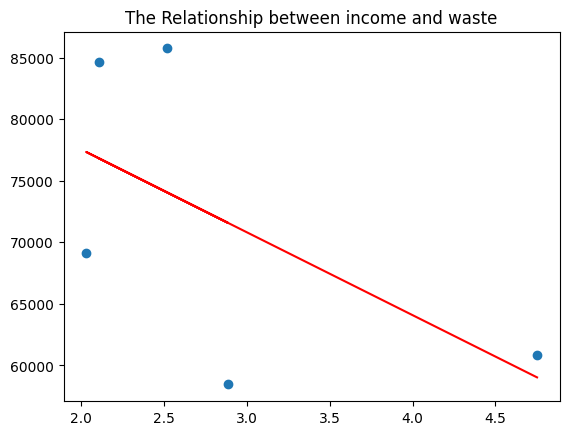

In [64]:

plt.scatter(merged_suburb_waste_df['weekly_weight_by_unit'], merged_suburb_waste_df['mean_income'])
x = merged_suburb_waste_df['weekly_weight_by_unit']
y = merged_suburb_waste_df['mean_income']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), color='red')
plt.title("The Relationship between income and waste")
plt.show()


In [53]:
merged_suburb_waste_df[['mean_income', 'weekly_weight_by_unit']].corr()

,mean_income,weekly_weight_by_unit
mean_income,1.000000,-0.580303
weekly_weight_by_unit,-0.580303,1.000000


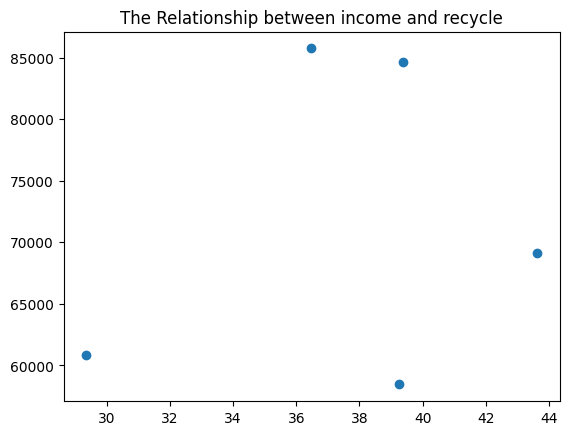

In [38]:
plt.title("The Relationship between income and recycle")
plt.scatter(merged_suburb_waste_df['pct_recycled_waste'], merged_suburb_waste_df['mean_income'])
plt.show()


C:\Users\dlatl\AppData\Local\Temp\ipykernel_20676\571110797.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_suburb_waste_df.corr());


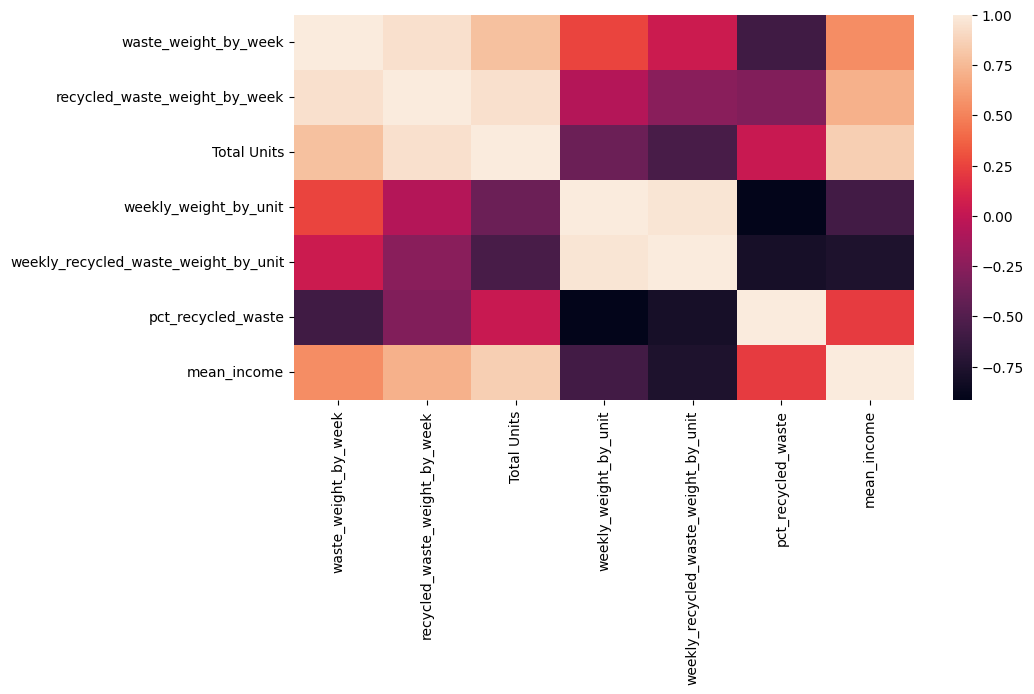

In [24]:
plt.figure(figsize=(10, 5))
sns.heatmap(merged_suburb_waste_df.corr());